In [1]:
"""Example of the optimization process for SGOOP.  Here we find the weights of cos(phi),sin(phi),cos(psi),sin(psi)
for alanine dipeptide in vacuum from a metadynamics trajectory.  We use the cos and sin of dihedral angles to avoid
inaccuracy caused by the discontinuity of angles (pi = -pi)."""
import sgoop
import reweight
import scipy.optimize as opt
import numpy as np
import time
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [2]:
def opti_func(rc):
    global nfev
    nfev +=1
    p = reweight.reweight(rc)
    sgoop.set_bins(rc,np.shape(p)[0],reweight.s_min,reweight.s_max) # Setting bins for maxcal
    return -sgoop.sgoop(rc,p)

In [3]:
def print_fun(x, f, accepted):
    global now,last,nfev,lastf
    now=time.time()
    print(x,end=' ')
    if accepted == 1:
        print("with spectral gap %.4f accepted after %3i runs (%.3f)" % (-f, nfev-lastf, now-last))
    else:
        print("with spectral gap %.4f declined after %3i runs (%.3f)" % (-f, nfev-lastf, now-last))
    last=now
    lastf=nfev

In [4]:
# Calculating the optimal 2 well RC.
sgoop.wells = 2
start = time.time()
last = start
lastf = nfev = 0
minimizer_kwargs = {"options": {"maxiter":10}}
ret = opt.basinhopping(opti_func,[-1,-1,1,1],niter=100,T=.001,stepsize=.1, minimizer_kwargs=minimizer_kwargs, callback=print_fun)
end = time.time()
print(end-start)
ret

[-1.053 -1.033  0.935  0.916] with spectral gap 0.0036 accepted after  12 runs (11.858)
[-1.089 -0.976  0.839  0.936] with spectral gap 0.0052 accepted after   6 runs (5.759)
[-1.100 -1.075  0.931  0.990] with spectral gap 0.0040 accepted after   6 runs (5.617)
[-1.032 -1.008  0.893  0.933] with spectral gap 0.0038 declined after   6 runs (5.682)
[-1.012 -1.135  0.988  0.891] with spectral gap 0.0028 accepted after   6 runs (5.772)
[-1.053 -1.107  0.915  0.854] with spectral gap 0.0039 accepted after   6 runs (5.680)
[-1.017 -1.048  1.011  0.858] with spectral gap 0.0027 declined after   6 runs (5.790)
[-0.969 -1.045  0.904  0.873] with spectral gap 0.0032 accepted after   6 runs (5.627)
[-0.949 -1.127  0.937  0.847] with spectral gap 0.0027 declined after   6 runs (5.613)
[-0.961 -1.113  0.988  0.938] with spectral gap 0.0023 accepted after   6 runs (5.710)
[-0.962 -1.055  1.022  0.940] with spectral gap 0.0020 accepted after   6 runs (5.756)
[-0.930 -1.130  1.012  0.930] with spectra

[-2.444 -2.036  0.929  0.683] with spectral gap 0.0227 accepted after   6 runs (5.673)
[-2.376 -1.980  0.910  0.724] with spectral gap 0.0228 accepted after   6 runs (5.760)
[-2.332 -2.065  0.816  0.748] with spectral gap 0.0237 accepted after   6 runs (5.804)
[-2.430 -2.161  0.706  0.728] with spectral gap 0.0226 declined after   6 runs (5.716)
[-2.366 -2.156  0.705  0.809] with spectral gap 0.0225 accepted after   6 runs (5.571)
[-2.253 -2.206  0.700  0.914] with spectral gap 0.0228 accepted after   6 runs (5.651)
4198.427212238312


                        fun: -0.02397586279326247
 lowest_optimization_result:       fun: -0.02397586279326247
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([ 0.000,  0.000,  0.000,  0.000])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 1
     njev: 5
   status: 0
  success: True
        x: array([-2.153, -1.995,  0.726,  0.713])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 8
                       nfev: 4471
                        nit: 100
                       njev: 731
                          x: array([-2.153, -1.995,  0.726,  0.713])

[10.059441879554788 8.715738497905644 7.544756394123438 6.4029511661240806
 5.58483363994593 4.892730307446217 4.399306431250188 4.054652712224171
 3.932961619864679 4.102168466846801 4.555527666431603 5.449999678430898
 6.433642281367786 7.482973521047227 8.376180486225646 9.776046991682147
 10.645484968053259 11.090964534996855 12.440472987554918
 12.191260524139022 12.95510174557561 12.023511486149086
 12.695445585589226 11.36007842911527 10.22282863155545 8.887643090331027
 8.394640011707008 7.526530355355506 6.494136928837317 6.348794361739145
 5.732487535418424 5.008037610874583 4.438348657251994 4.020974945462245
 3.4586716026887148 2.9656163271362472 2.562174913576401
 2.1382086765371437 1.9956174524175663 1.918053242845454
 2.1761660575632624 2.5272446683947454 2.909962597978457
 3.5387642972123032 4.381170713136825 5.099559085514438 6.281006241948553
 6.927549683277089 8.393872429589653]


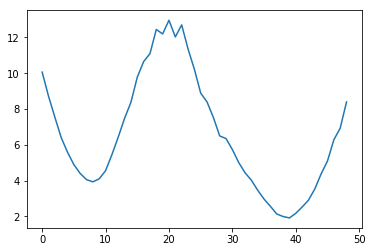

In [5]:
# Checking self-consistency.
p=reweight.reweight(ret.x,sparse=True) # Make sure to turn trimming off for this check.
plt.plot(-np.ma.log(p))
print(-np.ma.log(p))
# This is self-consistent.  

In [ ]:
# Calculating the optimal 3 well RC.
sgoop.wells = 3
start = time.time()
last = start
lastf = nfev = 0
minimizer_kwargs = {"options": {"maxiter":10}}
# Here I increase number of iterations after seeing a result that just barely fails the > kT barrier test.
ret = opt.basinhopping(opti_func,[-1,-1,1,1],niter=200,T=.001,stepsize=.1, minimizer_kwargs=minimizer_kwargs, callback=print_fun)
end = time.time()
print(end-start)
ret

[-0.990 -0.969  1.036  0.911] with spectral gap 0.0184 accepted after  12 runs (11.548)
[-1.068 -1.005  1.044  0.842] with spectral gap 0.0186 accepted after   6 runs (5.938)
[-1.096 -1.080  1.070  0.869] with spectral gap 0.0191 accepted after   6 runs (5.801)
[-1.118 -1.071  1.053  0.799] with spectral gap 0.0194 accepted after   6 runs (5.841)
[-1.138 -1.125  1.000  0.702] with spectral gap 0.0208 accepted after   6 runs (5.661)
[-1.064 -1.089  1.068  0.775] with spectral gap 0.0201 declined after   6 runs (5.845)
[-1.218 -1.179  0.903  0.763] with spectral gap 0.0203 accepted after   6 runs (5.700)
[-1.201 -1.234  0.869  0.688] with spectral gap 0.0223 accepted after   6 runs (5.779)
[-1.175 -1.298  0.851  0.720] with spectral gap 0.0231 accepted after   6 runs (5.861)
[-1.207 -1.311  0.858  0.737] with spectral gap 0.0226 accepted after   6 runs (5.925)
[-1.191 -1.320  0.803  0.730] with spectral gap 0.0234 accepted after   6 runs (5.855)
[-1.179 -1.272  0.844  0.758] with spectra

[-1.306 -1.824  1.246  0.225] with spectral gap 0.0325 declined after  30 runs (35.237)
[-1.478 -1.867  1.326  0.244] with spectral gap 0.0342 accepted after   6 runs (7.192)
[-1.400 -1.967  1.266  0.296] with spectral gap 0.0308 declined after   6 runs (8.020)
[-1.475 -1.789  1.250  0.297] with spectral gap 0.0339 accepted after 180 runs (204.497)
[-1.492 -1.680  1.287  0.271] with spectral gap 0.0315 accepted after   6 runs (5.791)
[-1.543 -1.733  1.173  0.302] with spectral gap 0.0329 accepted after  42 runs (39.842)
[-1.633 -1.961  1.227  0.271] with spectral gap 0.0316 declined after  42 runs (39.660)
[-1.493 -1.851  1.052  0.349] with spectral gap 0.0271 declined after  60 runs (56.555)
[-1.496 -1.648  1.062  0.311] with spectral gap 0.0301 declined after   6 runs (5.678)
[-1.470 -1.625  1.185  0.356] with spectral gap 0.0313 declined after   6 runs (5.703)
[-1.465 -1.789  1.158  0.417] with spectral gap 0.0307 declined after  54 runs (51.071)
[-1.440 -1.662  1.092  0.322] with s

[13.520440204871734 12.486298335252359 11.770710068603503
 10.816625267389298 10.389189312856693 9.865971707025675 9.25342625963927
 8.597804606165012 7.851726041246988 7.244188917802419 6.461768754639659
 5.780442866073182 5.175027249997792 4.678409876649385 4.264572181139325
 3.881153379064731 3.8827780724850935 4.27055838582492 5.346709939854698
 6.678935480421068 7.522055023808842 7.540408001764686 6.799551047316638
 6.215746632356263 5.525195088934214 4.780860878316756 4.164256502890166
 3.6568439023981396 3.0053070904103074 2.568462227310611 2.240180288182176
 2.157509686324427 2.9472639082230327 3.3138232346058536 3.513928970630313
 3.351977135373134 3.1812525244493934 2.9503780021133688 2.887827567667003
 2.872627687068999 2.9719888180390286 3.3423230730541427 3.654129528877729
 4.277474160269032 5.081886065761285 5.824095353802255 6.644659383522979
 7.324221229740438 8.149653018902674 16.233383589176427]


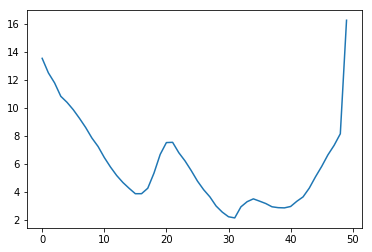

In [10]:
# Checking self-consistency.
p=reweight.reweight(ret.x,sparse=True) # Make sure to turn trimming off for this check.
plt.plot(-np.ma.log(p))
print(-np.ma.log(p))
# This is not self-consistent.  We use the 2 well result.

In [ ]:
# You would then run subsequent metadynamics simulations using the 2 well RC for biasing.